In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.ndimage import gaussian_filter1d

In [2]:
# Some constants
ndir = 10 # Number of directions from peeling off

In [3]:
# Load in the data
df = pd.read_csv("../data/all_basic_data.csv")

redshift_int = 6    # Or choose any of 10, 9, 8, 7, 6, 5, 4
redshift = 6.0      # Or choose any of 10, 9, 8, 7, 6, 5, 4.64

# Load in the z=6 lya and ha spectra
# WARNING it is mandatory to first decompress the tar.gz files before reading them 
with open(f"../data/lya_ha_spec_profs/ha_spec_prof_z{redshift_int}.json") as f:
    ha_dat = json.load(f)
    
with open(f"../data/lya_ha_spec_profs/lya_spec_prof_z{redshift_int}.json") as f:
    lya_dat = json.load(f)

In [4]:
# Min and max wavelengths for lya and ha spectra
lya_lmin = 1165.67; lya_lmax = 1265.67
ha_lmin = 6512.8; ha_lmax = 6612.8

In [30]:
# Print a header
df_z = df[df["redshift"]==redshift]
df_z.head(n=35)

,halo_id,redshift,x,y,z,mvir,rvir,stellar_mass,sfr_3,sfr_5,...,F277W_int,F300M_int,F335M_int,F356W_int,F360M_int,F410M_int,F430M_int,F444W_int,F460M_int,F480M_int
420,286,6.0,0.028753,0.164196,0.989784,9.655074,0.002542,7.77,0.06,0.20,...,29.277226,29.169111,28.829877,29.074223,28.957540,29.343774,29.353789,29.151054,28.574024,29.294040
421,997,6.0,0.188209,0.151902,0.017834,9.385045,0.002065,7.66,0.07,0.14,...,29.230379,29.162740,29.040788,29.235830,29.204413,29.506473,29.544033,29.331227,28.723660,29.555056
422,998,6.0,0.203132,0.141310,0.041008,10.419300,0.004575,8.57,0.40,0.54,...,27.970927,27.792123,27.504835,27.679204,27.578433,27.843038,27.845551,27.747330,27.420408,27.812654
423,4859,6.0,0.238442,0.238972,0.009321,9.782129,0.002802,7.88,0.59,0.51,...,29.285563,29.153752,28.539361,28.907862,28.711657,29.339969,29.338373,29.013256,28.225880,29.232658
424,5061,6.0,0.173879,0.165897,0.981873,10.173441,0.003784,8.52,0.54,0.78,...,27.954592,27.801054,27.464522,27.663522,27.552603,27.843273,27.837811,27.673145,27.186385,27.736968
425,5918,6.0,0.027583,0.242061,0.980855,10.155114,0.003732,8.12,1.35,0.97,...,28.600335,28.468606,27.806496,28.211895,27.972707,28.728097,28.739525,28.387700,27.552087,28.705977
426,6254,6.0,0.097892,0.374220,0.006785,9.163315,0.001742,6.88,0.57,0.56,...,29.958393,29.859593,29.115392,29.604846,29.391302,30.313825,30.333037,29.701578,28.564248,30.259343
427,7707,6.0,0.011688,0.525450,0.255492,9.700267,0.002631,7.84,6.71,5.11,...,27.669631,27.599474,26.367254,26.995818,26.577720,28.121062,28.140669,27.422594,26.217193,28.086575
428,9246,6.0,0.204004,0.375082,0.056984,9.343688,0.002004,7.33,0.13,0.12,...,29.553027,29.489012,29.150317,29.441545,29.344464,29.797056,29.814013,29.464480,28.637932,29.719693
429,9482,6.0,0.236701,0.531891,0.166199,10.447042,0.004670,8.90,1.36,1.36,...,26.996442,26.840436,26.422421,26.647623,26.496070,26.852840,26.849276,26.726586,26.338010,26.778941


Text(0, 0.5, '${\\rm Luminosity\\ [erg/s]}$')

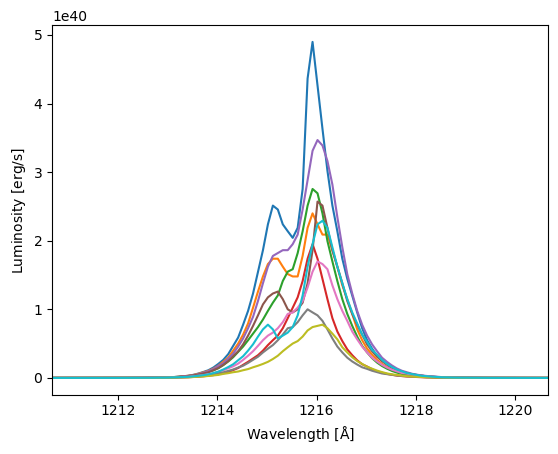

In [35]:
# Make a plot of the Lya spectra for some galaxy in the json
halo_id = "44763"

for i in range(ndir):
    plt.plot(
        lya_dat[halo_id][f"dir_{i}"]["lya_spectrum_bins"],
        10.**np.array(lya_dat[halo_id][f"dir_{i}"]["lya_spectrum"]),
    )
    
plt.xlim(1215.67-5,1215.67+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.ylabel(r"${\rm Luminosity\ [erg/s]}$")

Text(0, 0.5, '${\\rm Luminosity\\ [erg/s]}$')

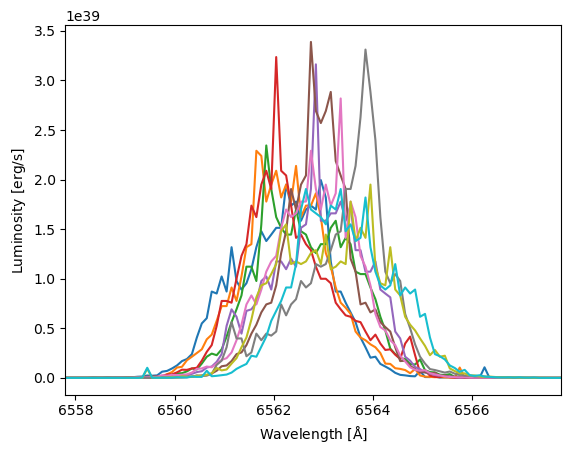

In [36]:
# Do the same for Halpha
# Note that the units are erg/s in the spectral bin which is 0.1A
for i in range(ndir):
    plt.plot(
        ha_dat[halo_id][f"dir_{i}"]["ha_spectrum_bins"],
        10.**np.array(ha_dat[halo_id][f"dir_{i}"]["ha_spectrum"]),
    )
    
plt.xlim(6562.8-5,6562.8+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.ylabel(r"${\rm Luminosity\ [erg/s]}$")

Text(0.5, 1.0, '${\\rm H\\alpha\\ Spectra\\ With\\ LSF}$')

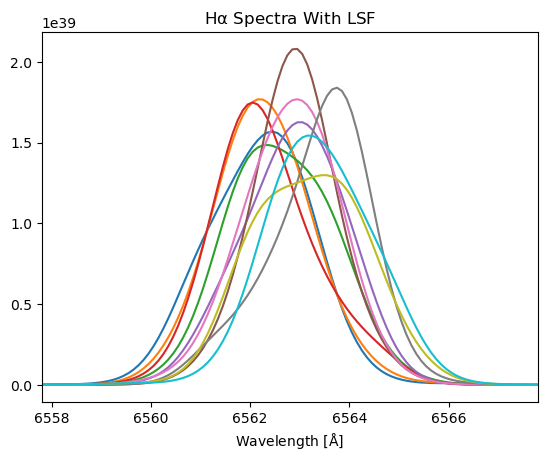

In [37]:
# All of the spectra were run at 0.1A resolution. We can make this plot convolving with a line spread function of 0.5A
# Then it starts to look more realistic :) 

for i in range(ndir):
    plt.plot(
        ha_dat[halo_id][f"dir_{i}"]["ha_spectrum_bins"],
        gaussian_filter1d(10.**np.array(ha_dat[halo_id][f"dir_{i}"]["ha_spectrum"]),5)
    )
    
plt.xlim(6562.8-5,6562.8+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.title(r"${\rm H\alpha\ Spectra\ With\ LSF}$")